# 反向传播算法

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D

# Default parameters for plots
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.titlesize'] = 20
matplotlib.rcParams['figure.figsize'] = [9, 7]
matplotlib.rcParams['font.family'] = ['SimHei']# ['Noto Sans CJK JP']
matplotlib.rcParams['axes.unicode_minus']=False 

%matplotlib inline

## 激活函数的导数
---
### sigmod函数的导数

$$ Sigmoid(x) = \sigma(x)= \frac {1} {1+e^{-x}}$$
导数:
$$\frac d {dx} g(x) = \frac {-1} {(1+e^{-x})^2} \frac{d e^{-x}} {dx} = {\frac{1}{1 + e^{-x}} (1-\frac{1}{1 + e^{-x}})}=g(x)(1-g(x))$$

注：

当$z$ = 10或$z= -10$ ; $\frac{d}{dz}g(z)\approx0$

当$z ​$= 0 , $\frac{d}{dz}g(z)\text{=g(z)(1-g(z))=}{1}/{4}​$

在神经网络中$a= g(z)$; $g{{(z)}^{'}}=\frac{d}{dz}g(z)=a(1-a)$
一些其他性质:
$$
\sigma(x) = \frac {exp(x)}{exp(x) + exp(0)} \\
1 - \sigma(x) = \sigma(-x)
$$

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def derivative(x):
    return sigmoid(x) * (1-sigmoid(x))

x = np.linspace(-6, 6, 100)

plt.figure()
plt.plot(x, sigmoid(x), label='Sigmoid')
plt.plot(x, derivative(x), label='导数')
ax = plt.gca()
ax.spines['left'].set_position(('data', 0))
plt.legend()
plt.show()

### ReLU

$$Relu(x) = max(0, x)$$

导数:
$$
g(z)^{'}=
  \begin{cases}
  0&	\text{if z < 0}\\
  1&	\text{if z > 0}\\
undefined&	\text{if z = 0}
\end{cases}
$$

In [ ]:
def relu(x):
    return np.where(x>0, x, 0)


def derivative(x):
    d = np.array(x, copy=True)
    d[x<0] = 0
    d[x>=0] = 1
    return d

x = np.linspace(-6, 6, 100).reshape(-1, 1)

plt.figure()
plt.plot(x, relu(x), label='Relu')
plt.plot(x, derivative(x), label='导数')
ax = plt.gca()
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
plt.legend()
plt.show()

### Leaky ReLU

$$Leaky Relu(x) = max(px, x)$$
导数:
$$
g(z)^{'}=
\begin{cases}
p& 	\text{if z < 0}\\
1&	\text{if z > 0}\\
undefined&	\text{if z = 0}
\end{cases}
$$

In [ ]:
def leaky_relu(x, p=0.02):
    return np.where(x>0, x, p*x)


def derivative(x, p):
    dx = np.ones_like(x)
    dx[x<0] = p
    return dx

x = np.linspace(-6, 6, 100)
plt.figure()
p = 0.1
plt.plot(x, leaky_relu(x, p), label='Leaky Relu')
plt.plot(x, derivative(x, p), label='导数')
ax = plt.gca()
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
plt.legend()
plt.show()

### Tanh
$$
tanh(x) = \frac {e^x - e^{-x}} {e^x + e^{-x}} = 2 \cdot sigmoid(2x) - 1
$$

导数:
$$\frac{d}{{d}z}g(z) = \frac {4e^z e^{-z}}{(e^z + e^{-z})^2}  =  1 - (tanh(z))^{2}$$

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return 2 * sigmoid(2*x) - 1

def derivative(x):
    return 1 - tanh(x) ** 2

x = np.linspace(-6, 6, 100)

plt.figure()
plt.plot(x, tanh(x), label='Tanh')
plt.plot(x, derivative(x), label='导数')
ax = plt.gca()
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
plt.legend()
plt.show()

## 损失函数的梯度
---
### MSE函数梯度
均方差误差损失函数:
$$
L = \frac 1 2 \sum_{k=1}^K (y_k - o_k)^2
$$
梯度:
$$
\frac {\partial L} {\partial {o_i}} = \frac 1 2 \sum_{k=1}^K \frac {\partial}{\partial o_i}  (y_k - o_k)^2 \\ 
= \frac 1 2 \sum_{k=1}^K 2 \cdot (y_k - o_k) \cdot \frac {\partial (y_k - o_k)}{\partial o_i} \\
= \sum_{k=1}^K (o_k - y_k)\cdot \frac {\partial o_k} {\partial o_i}
$$

可见, $\frac {\partial L} {\partial {o_i}}$仅当k=i时为1, 其它点都为0, 也就是说,偏导数$\frac {\partial L} {\partial {o_i}}$只与第i号节点相关, 与其他节点无关, 所以写成:
$$
\frac {\partial L} {\partial {o_i}} = (o_i - y_i)
$$

### 交叉熵函数梯度
**Softmax函数梯度**
$$
p_i = \frac {e^{z_i}}{\sum_{k=1}^K e^{z_k}}
$$
它的功能是将𝐾个输出节点的值转换为概率，并保证概率之和为1.
- i = j时。Softmax 函数的偏导数:
$$
\frac {\partial p_i}{\partial z_j} = \frac {\partial \frac {e^{z_i}}{\sum_{k=1}^K e^{z_k}}}{ \partial z_j}
= \frac {e^{z_i} \sum_{k=1}^K e^{z_k}  - e^{z_j}e^{z_i} } {(\sum_{k=1}^K e^{z_k})^2}  \\ 
= \frac {e^{z_i} (\sum_{k=1}^K e^{z_k}  - e^{z_j})} {(\sum_{k=1}^K e^{z_k})^2}
= \frac {e^{z_i}} {\sum_{k=1}^K e^{z_k}} \times \frac {\sum_{k=1}^K e^{z_k}  - e^{z_j}} {\sum_{k=1}^K e^{z_k}}
$$
可以看到, 上式为$p_i$和$1-p_j$相乘, 当$i = j$时,
$$
\frac {\partial p_i}{\partial z_j} = p_i(1-p_j), i=j
$$
- $i \neq j$时,
$$
\frac {\partial p_i}{\partial z_j} = \frac {\partial \frac {e^{z_i}}{\sum_{k=1}^K e^{z_k}}}{ \partial z_j} 
= \frac { 0 - e^{z_j}e^{z_i} } {(\sum_{k=1}^K e^{z_k})^2} \\
= \frac {-e^{z_j}} {\sum_{k=1}^K e^{z_k}} \times \frac {e^{z_i}} {\sum_{k=1}^K e^{z_k}}
= - p_j \cdot p_i
$$

综上, Softmax函数的梯度表达式:
$$
\frac {\partial p_i}{\partial z_j} = \begin{cases}p_i(1-p_j), \quad i=j \\
-p_i\cdot p_j, \quad i \neq j
\end{cases}
$$

**交叉熵梯度**

交叉熵损失函数
$$
L = -\sum_k y_klog(p_k)
$$
这里直接来推导最终损失值L对网络输出logits 变量$z_i$的偏导数，展开为
$$
\frac {\partial L}{z_i} = -\sum_k y_k \frac {\partial log(p_k)}{\partial z_i}\\
=  -\sum_k y_k \frac {\partial log(p_k)}{\partial p_k}\cdot \frac {\partial p_k}{\partial z_i} \\
= -\sum_k y_k \frac 1 {p_k}\cdot \frac {\partial p_k}{\partial z_i}
$$
与上面的Softmax 处理类似, 将求和符号拆分为 𝑘 = 𝑖 以及𝑘 ≠ 𝑖的两种情况:
$$
\frac {\partial L}{z_i} = y_i \frac 1 {p_i} \cdot \frac {\partial p_i}{\partial z_i} + 
-\sum_{k\neq i} y_k \frac 1 {p_k}\cdot \frac {\partial p_k}{\partial z_i} \\
= -y_i(1-p_i) - \sum_{k\neq i} y_k \frac 1 {p_k}(-p_k \cdot p_i) \\
= p_i(y_i + \sum_{k\neq i} y_k)- y_i
$$
特别地，对于分类问题中标签𝑦通过One-hot 编码的方式，则有如下关系:
$$
\sum_{k} y_k = 1 \\
y_i + \sum_{k\neq i} y_k = 1
$$
所以交叉熵的偏导数可以进一步化简:
$$
\frac {\partial L}{z_i} = p_i - y_i
$$

## 全连接层梯度
以全连接层网络、激活函数采用Sigmoid 函数、误差函数为Softmax+MSE 损失函数的神经网络为例，推导其梯度传播规律
### 单神经元梯度
对于采用Sigmoid 激活函数的神经元模型，它的数学模型可以写为：
$$
o^{(1)} = \sigma(w^{(1)^T} x + b^{(1)})
$$
其中变量的上标表示层数, $o^{(1)}$表示第一层的输出

![](./单神经元梯度.png)

如果我们采用均方误差函数，考虑到单个神经元只有一个输出$o_1^{(1)}$，那么损失可以表达为：
$$L = \frac 1 2 (o^{(1)}_1 - t)^2 = \frac 1 2 (o_1 - t)^2$$
以权值参数$w_{j1}$为例, 偏导数:

$$
\frac {\partial L}{\partial w_{j1}} = (o_1 - t)\frac {\partial o_1}{\partial w_{j1}} \\
= (o_1 - t) \frac {\partial \sigma(z_1)}{\partial z_{1}} \frac {\partial z^{(1)}_1}{\partial w_{j1}} \\
= (o_1 - t)\sigma(z_1)(1-\sigma(z_1))\frac {\partial z^{(1)}_1}{\partial w_{j1}} \\
= (o_1 - t)o_1(1 - o_1)\frac {\partial z^{(1)}_1}{\partial w_{j1}} \\
=  (o_1 - t)o_1(1 - o_1)x_{j}
$$
可见, 误差对权值$w_{j1}$的偏导只与输出值$o_1$, 真实值t以及当前权值连接的输入$x_j$有关

### 全连接层梯度
们把单个神经元模型推广到单层的全连接层的网络上

![](./全连接层梯度.png)

全连接层的均方差误差:
$$
L = \frac 1 2 \sum_{i=1}^K(o_i^{(1)} - t_i)^2
$$
对权值$w_{jk}$的偏导数只与输出节点$o_k^{(1)}$有关, 可以去除求和符号, 即$i = k$:
$$
\frac {\partial L} {\partial w_{jk}} = (o_k - t_k) \frac {\partial o_k}{ \partial w_{jk}} \\
= (o_k -t_k)o_k(1-o_k)\frac {\partial z_k}{\partial w_jk} \\
= (o_k -t_k)o_k(1-o_k)x_j
$$
令$\delta_k = (o_k -t_k)o_k(1-o_k)$, 则:
$$
\frac {\partial L} {\partial w_{jk}} = \delta_k x_j
$$


神经网络的损失函数L来自各个输出节点$o_k^{K}$, 而其又与隐藏层的输出节点$o_j^{(J)}$相关联.

![](./梯度传播.png)

根据链式求导法则
$$
\frac {\partial L}{\partial w_{ij}^{(J)}} = 
\frac {\partial L}{\partial o_{j}^{(J)}} \frac {\partial o_{j}^{(J)}}{\partial w_{ij}^{(J)}} = 
\frac {\partial L}{\partial o_{k}^{(K)}}  \frac {\partial o_{k}^{(K)}}{\partial o_{j}^{(J)}} \frac {\partial o_{j}^{(J)}}{\partial w_{ij}^{(J)}}
$$
$\frac {\partial L}{\partial o_{k}^{(K)}}$可以从误差函数中直接推到出, $\frac {\partial o_{k}^{(K)}}{\partial o_{j}^{(J)}}$可以由全连接层公式推导, $\frac {\partial o_{j}^{(J)}}{\partial w_{ij}^{(J)}}
$的导数即为输入$x^{(I)}_i$

通过链式法则，直接可以将偏导数进行分解，层层迭代即可推导出.

In [ ]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
try:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
except RuntimeError as e:
    print(e)

In [ ]:
x = tf.constant(1.)
w1 = tf.constant(2.)
b1 = tf.constant(1.)
w2 = tf.constant(2.)
b2 = tf.constant(1.)

In [ ]:
# 构建梯度记录器
with tf.GradientTape(persistent=True) as tape:
    # 非 Variable类型 手动记录梯度信息  
    tape.watch([w1, b1, w2, b2])
    y1 = x * w1 + b1
    y2 = y1 * w2 + b2
    
# 独立求解出各个偏导数
dy_2_dy1 = tape.gradient(y2, [y1])[0]
dy_1_dw1 = tape.gradient(y1, [w1])[0]
dy_2_dw1 = tape.gradient(y2, [w1])[0]

In [ ]:
print(dy_2_dw1)
print(dy_2_dy1 * dy_1_dw1)

## 反向传播
---
输出层的偏导公式
$$
\frac {\partial L} {\partial w_{jk}}
= (o_k -t_k)o_k(1-o_k)x_j = \delta_k x_j
$$

![](./反向传播.png)


计算倒数第二层的偏导数$\frac {L}{w_ij^{(J)}}$
$$
\frac {\partial L}{\partial w_{ij}^{(J)}} = \frac {\partial}{ \partial w_{ij}^{(J)}} \frac 1 2 \sum_k(o_k-t_k)^2 \\
= \sum_k(o_k-t_k) \frac {\partial o_k}{ \partial w_{ij}} \\
= \sum_k(o_k-t_k) \frac {\partial \sigma(z_k)}{ \partial o_j} \frac {\partial o_j}{ \partial w_{ij}}\\
= \sum_k(o_k-t_k) \sigma(z_k) (1 - \sigma(z_k)) \frac {\partial z_k}{ \partial o_j} \frac {\partial o_j}{ \partial w_{ij}} \\ 
= \sum_k(o_k-t_k) o_k (1 - o_k) \frac {\partial z_k}{ \partial o_j} \frac {\partial o_j}{ \partial w_{ij}} \\ 
= \sum_k(o_k-t_k) o_k (1 - o_k) w_{jk} \frac {\partial o_j}{ \partial w_{ij}} \\
= \sum_k(o_k-t_k) o_k (1 - o_k) w_{jk} \frac {\partial \sigma(z_j)}{ \partial z_{j}}  
\frac {\partial z_j}{ \partial w_{ij}}\\
= \sum_k(o_k-t_k) o_k (1 - o_k) w_{jk} \sigma(z_j)(1-\sigma(z_j))\frac {\partial z_j}{ \partial w_{ij}} \\
= \sum_k(o_k-t_k) o_k (1 - o_k) w_{jk} o_j(1-o_j)\frac {\partial z_j}{ \partial w_{ij}} \\
= o_j(1-o_j)\frac {\partial z_j}{ \partial w_{ij}} \sum_k(o_k-t_k) o_k (1 - o_k) w_{jk} \\
= o_j(1-o_j)o_i \sum_k \delta_k^{(k)}w_{jk}
$$

定义
$$ 
\delta^{(J)}_j \triangleq o_j(1-o_j)\sum_k \delta_k^{(K)}w_{jk} 
$$
则与输出层偏导数类似的:
$$
\frac {\partial L}{\partial w_{ij}^{(J)}} = \delta^{(J)}_j o_i^{(I)} 
$$
$\delta$可以简单理解为当前连接$w_{ij}$对误差函数的贡献值

传播规律:
输出层:
$$
\frac {\partial L}{\partial w_{jk}} = \delta_k^{(K)}o_j \\
\delta_k^{(K)} = o_k(1-o_k)(o_k -t_k)
$$
倒数第二层:
$$
\frac {\partial L}{\partial w_{ij}} = \delta_j^{(J)}o_i \\
\delta_j^{(J)} = o_j(1-o_j)\sum_k \delta_k^{(K)}w_{jk} 
$$
倒数第三层:
$$
\frac {\partial L}{\partial w_{ni}} = \delta_i^{(I)}o_n \\
\delta_i^{(I)} = o_i(1-o_i)\sum_j \delta_j^{(J)}w_{ij} 
$$
$o_n$是倒数第三层的输入, 即倒数第四层的输出.
按照这个规律, 只需要循环迭代计算每一次每个节点的$\delta_k^{(K)}, \delta_j^{(J)} , \delta_i^{(I)}$等值即可求得当前层的偏导数, 从而得到每层权值矩阵W的梯度,在通过梯度下降算法迭代优化网络参数即可.

[计算图(Computational Graph) 1](https://blog.csdn.net/xbinworld/article/details/56523063)

[计算图(Computational Graph) 2](https://samaelchen.github.io/deep_learning_step2/)

## Himmelblau 函数优化实战
Himmelblau 函数是用来测试优化算法的常用样例函数之一:
$$
f(x, y) = (x^2+y-11)^2 + (x + y^2 - 7)^2
$$

利用 TensorFlow 自动求导来求出函数在𝑥和𝑦的偏导数，并循环迭代更新𝑥和𝑦值，

In [ ]:
def himmelblau(x):
    # x: 2个元素的list [x,y]
    return (x[0] ** 2 + x[1] - 11) ** 2 + (x[0] + x[1] ** 2 -7) ** 2

x, y = np.mgrid[-6:6:0.01, -6:6:0.01]
z = himmelblau([x, y])
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x, y, z, cmap=plt.get_cmap('hot'))
ax.view_init(60, -30)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

In [ ]:
plt.contour(x, y, z, levels=100 ,cmap=plt.get_cmap('rainbow'))

In [ ]:
x1 = tf.constant([4., 0.])
def calcu(x):
    for step in range(200):
        with tf.GradientTape() as tape:  # 梯度跟踪
            tape.watch([x])  # 非Variable 手动 加入梯度跟踪列表 
            y = himmelblau(x)
        # 反向传播
        grads = tape.gradient(y, [x])[0]  # y对x的梯度
        # 更新参数
        x -= 0.01 * grads
        if step % 20 == 19:
            print(f'step {step}: x={x.numpy()}, f(x)={y.numpy()}')
calcu(x1)

In [ ]:
x2 = tf.constant([-3.,-3.])
calcu(x2)

In [ ]:
x3 = tf.constant([-3., 2.])
calcu(x3)

In [ ]:
x4 = tf.constant([3., 1.])
calcu(x4)

不同初始值得到多种极小值数值解。参数的初始化状态是可能影响梯度下降算法的搜索轨迹的，甚至有可能搜索出完全不同的数值解.

## 反向传播实战
实现一个4 层的全连接网络，来完成二分类任务。网络输入节点数为2，隐藏层的节点数设计为：25、50和25，输出层两个节点，分别表示属于类别1 的概率和类别2的概率.

利用前面介绍的多层全连接网络的梯度推导结果，直接利用Python 循环计算每一层的梯度，并按着梯度下降算法手动更

In [5]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

N_SAMPLES = 3000
TEST_SIZE = 0.2
X, y = make_moons(n_samples=N_SAMPLES, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=42)

In [8]:
y_train.shape

(2400,)

findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.


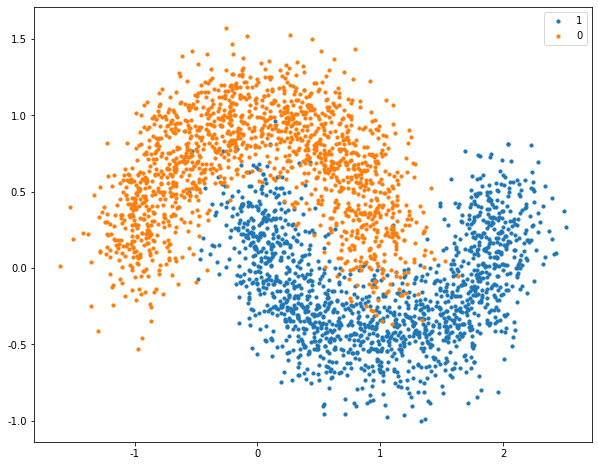

In [6]:
plt.figure(figsize=(10, 8))
plt.scatter(X[y==1, 0], X[y==1, 1], s=10, label='1')
plt.scatter(X[y==0, 0], X[y==0, 1], s=10, label='0')
plt.legend()

In [2]:
# 手动创建全连接层
class Layer:
    # 参数: 输入节点数 ,输出节点数, 激活函数, 权值, 偏置 
    def __init__(self, n_input, n_neurons, activation=None, weights=None, bias=None):
        self.weights = weights if weights is not None else np.random.randn(
            n_input, n_neurons) * np.sqrt(1 / n_neurons)
        self.bias = bias if bias is not None else np.random.randn(n_neurons) * 0.1
        self.activation = activation
        self.activation_output = None  # 进过激活函数后的输出
        self.error = None  # 计算delta 的中间量
        self.delta = None  # 每一层的delta, 用来计算梯度
    
    def activate(self, x):
        # x: (b, d_in) w: (d_in, d_out) b: 
        r = np.dot(x, self.weights) + self.bias
        self.activation_out = self._apply_activation(r)
        return self.activation_out
    
    def _apply_activation(self, r):
        # 激活函数
        if self.activation is None:
            # 恒等激励
            return r 
        elif self.activation == 'relu':
            return np.maximum(r, 0)
        elif self.activation == 'sigmoid':
            return 1 / (1 + np.exp(-r))
        elif self.activation == 'tanh':
            return np.tanh(r)
        else:
            return r
    def apply_activation_derivative(self, r):
        # 求激活函数的导数
        if self.activation is None:
            # 常数1
            return np.ones_like(r)
        elif self.activation == 'relu':
            d = np.array(r, copy=True)
            d[r < 0] = 0.
            d[r >= 0] = 1.
            return d 
        elif self.activation == 'sigmoid':
            return r * (1 - r)
        elif self.activation == 'tanh':
            return 1 - r ** 2
        else:
            return r

In [3]:
# 创建神经网络
class NeuralNetwork:
    def __init__(self):
        # 存放上面定义的全连接层
        self.layers = []
    def add_layer(self, layer):
        self.layers.append(layer)
    
    def feed_forward(self, X):
        # 前向传播, 逐渐通过每一层
        for layer in self.layers:
            X = layer.activate(X)
        return X  # 输出层  2个节点 类0 或 类1
    
    def backpropagation(self, X, y, learning_rate):
        # 反向传播算法 计算每一层的delta 
        # 前向计算 得到输出值
        out = self.feed_forward(X)
        for i in reversed(range(len(self.layers))):  # 从最后一层开始
            layer = self.layers[i]
            if layer == self.layers[-1]:  # 输出层
                # 使用 MSE 误差  
                layer.error = out - y  # 误差的导数
                # print(y.shape, out.shape)  (2, )
                layer.delta = layer.error * layer.apply_activation_derivative(out)
            else:  # 隐藏层
                next_layer = self.layers[i + 1]
                layer.error = np.dot(next_layer.weights, next_layer.delta)
                layer.delta = layer.error * layer.apply_activation_derivative(layer.activation_out)
        
        # 更新参数
        for i in range(len(self.layers)):
            layer = self.layers[i]
            # 上一层的输出 本层的输入
            o_i = np.atleast_2d(X if i == 0 else self.layers[i-1].activation_out)
            # weights (I, J)
            # o_i (1, I)
            # delta (J, )
            layer.weights -= learning_rate * layer.delta * o_i.T
    
    def fit(self, X, y, learning_rate=0.01 ,max_epochs=1000):
        # y onehot 处理
        y_onehot = np.zeros((y.shape[0], 2))
        y_onehot[np.arange(y.shape[0]),  y] =1
        
        mses = []
        for epoch in range(max_epochs):
            for j in range(X.shape[0]):  # 每次训练一个样本
                self.backpropagation(X[j], y_onehot[j], learning_rate)
            if epoch % 100 == 0:
                mse = np.mean(np.square(self.feed_forward(X) - y_onehot))
                mses.append(mse)
                print(f'Epoch: {epoch}, MSE: {mse}')
        return mses
    
    def predict(self, X):
        y_pred = self.feed_forward(X)
        out = np.argmax(y_pred, axis=1)
        return out
    

In [7]:
model = NeuralNetwork()
model.add_layer(Layer(2, 25, 'tanh'))  # h1  
model.add_layer(Layer(25, 50, 'tanh'))  # h2 
model.add_layer(Layer(50, 25, 'tanh'))  # h3
model.add_layer(Layer(25, 2, 'tanh'))  # output
mse = model.fit(X_train, y_train)

) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,) (2,)
(2,

KeyboardInterrupt: 

In [ ]:
plt.plot(mse)

In [ ]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

In [ ]:
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

In [ ]:
y = np.array([1, 0, 1, 0, 1, 1])
y_onehot = np.zeros((y.shape[0], 2))
y_onehot[np.arange(y.shape[0]),  y] =1
y_onehot

**使用tensorflow**
---

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential, losses, Model

class Network(Model):
    def __init__(self):
        super().__init__()
        self.model = Sequential([
            layers.Dense(25, activation='relu'),
            layers.Dense(50, activation='relu'),
            layers.Dense(25, activation='relu'),
            layers.Dense(2),
        ])
    
    def call(self, inputs, training=None, mask=None):
        # 在前向计算函数 call 中实现自定义网络类的计算逻辑即可
        out = self.model(inputs)
        return out

In [ ]:
network = Network()
# 通过 build 函数完成内部张量的创建 (batch_size, n_input_features)
network.build(input_shape=(32, 2))
network.summary()

In [ ]:
network.build?

In [ ]:
2 * 25 + 25 + 25 * 50 + 50 + 50* 25 + 25 + 25* 2 +2

In [ ]:
y_train_onehot = tf.one_hot(y_train, depth=2)

In [ ]:
train_db = tf.data.Dataset.from_tensor_slices((X_train, y_train_onehot))
train_db = train_db.shuffle(10000).batch(32)

tf.GradientTape?
```
tf.GradientTape(persistent=False, watch_accessed_variables=True)
persistent :默认情况下为False，这意味着最多可以在此对象上对gradient()方法进行一次调用。
watch_accessed_variables: 自动追踪所有 trainable 对象
```

In [ ]:
learn_rate = 0.01
train_losses = []  # Relu - 交叉熵损失
accurancy = []
for epoch in range(100):
    for step, (x, y) in enumerate(train_db):
        with tf.GradientTape() as tape:
            out = network(x)
            loss = losses.categorical_crossentropy(y, out, from_logits=True)
        grads = tape.gradient(loss, network.trainable_variables)
        
        for p, g in zip(network.trainable_variables, grads):
            p.assign_sub(learn_rate * g)
    
    out = network(X_test)
    y_pred = np.argmax(out, axis=1)
    acc = accuracy_score(y_test, y_pred)
    print(epoch, acc)
    accurancy.append(acc)
    train_losses.append(loss)
            

In [ ]:
plt.plot(accurancy)